In [1]:
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
with open("text.txt",'r', encoding='utf-8') as txt:
    sentences = txt.readlines()
    


print(f"Number of sentences {len(sentences)}")

print(f"First sentence from text file \n {sentences[0]}")

Number of sentences 2
First sentence from text file 
 Le Chien (Canis lupus familiaris) est la sous-espèce domestique de Canis lupus (Loup gris), un mammifère de la famille des Canidés (Canidae), laquelle comprend également le dingo, chien domestique retourné à l'état sauvage.



In [3]:
print(f"Second \n {sentences[0]}")

for index in range(len(sentences)):
    sentences[index] = re.sub("[^a-zA-Z]"," ", str(sentences[index]))
    
print(f"Second sentence from text file \n {sentences[0]}")

Second 
 Le Chien (Canis lupus familiaris) est la sous-espèce domestique de Canis lupus (Loup gris), un mammifère de la famille des Canidés (Canidae), laquelle comprend également le dingo, chien domestique retourné à l'état sauvage.

Second sentence from text file 
 Le Chien  Canis lupus familiaris  est la sous esp ce domestique de Canis lupus  Loup gris   un mammif re de la famille des Canid s  Canidae   laquelle comprend  galement le dingo  chien domestique retourn    l  tat sauvage  


In [4]:
word_tokenizer = []
for sent in sentences:
    word_tokens = word_tokenize(sent)
    word_tokenizer.append(word_tokens)
    
print(f"First sentence from text file \n {word_tokenizer[0]}")

First sentence from text file 
 ['Le', 'Chien', 'Canis', 'lupus', 'familiaris', 'est', 'la', 'sous', 'esp', 'ce', 'domestique', 'de', 'Canis', 'lupus', 'Loup', 'gris', 'un', 'mammif', 're', 'de', 'la', 'famille', 'des', 'Canid', 's', 'Canidae', 'laquelle', 'comprend', 'galement', 'le', 'dingo', 'chien', 'domestique', 'retourn', 'l', 'tat', 'sauvage']


In [5]:
from gensim.models import Word2Vec
model_cbow = Word2Vec(sentences=word_tokenizer,
                     vector_size=2,#number dimension default 100
                     window=2, #default 5
                     min_count=2, #mini count words to be consider default 5
                     workers=1, #default 3
                     sg=0 #0 for CBOW, 1 SKIP-Gram
                     )

words_cbow = list(model_cbow.wv.index_to_key)
print(f"Total number of words {len(words_cbow)}")
print(words_cbow)

model_cbow.wv.__getitem__(model_cbow.wv.index_to_key)

Total number of words 43
['de', 'l', 'la', 'et', 'e', 'est', 'ce', 's', 'le', 'chien', 'esp', 'Loup', 'des', 'Le', 'a', 'ans', 'd', 'les', 'Canis', 'lupus', 'fonctions', 'sous', 'apparition', 'sa', 'domestique', 'sont', 'gris', 're', 'du', 'lign', 'il', 'n', 'diff', 'premi', 't', 'domestiqu', 'comme', 'par', 'Homme', 'une', 'qui', 'ni', 'animal']


array([[-0.03036723,  0.01470195],
       [ 0.25341743,  0.4540549 ],
       [-0.4653893 , -0.3552865 ],
       [ 0.32265568,  0.44939154],
       [-0.25310567, -0.1851188 ],
       [ 0.3700329 , -0.07580333],
       [-0.22829503,  0.32858574],
       [-0.24416865, -0.08981559],
       [ 0.14209518,  0.05051661],
       [-0.41483214, -0.4702808 ],
       [ 0.36426455,  0.2545173 ],
       [ 0.337355  ,  0.03908183],
       [ 0.31720382, -0.16911496],
       [-0.04830081,  0.2888399 ],
       [-0.3771962 , -0.19555789],
       [-0.37633532, -0.04571957],
       [ 0.47638285, -0.3654669 ],
       [-0.11758071, -0.0962549 ],
       [ 0.40381575, -0.29651374],
       [ 0.00156825, -0.23741327],
       [-0.48085806,  0.25134635],
       [-0.43925318, -0.21847129],
       [-0.00142893, -0.01429444],
       [-0.38329878,  0.4813987 ],
       [ 0.24803069,  0.46222085],
       [-0.40861404,  0.22599623],
       [-0.20840198,  0.04362491],
       [ 0.42487952, -0.2224666 ],
       [ 0.22681211,

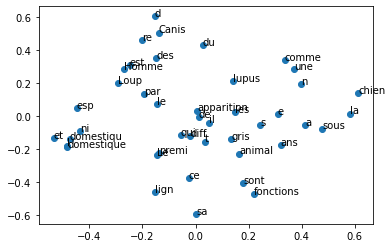

In [6]:
X = model_cbow.wv.__getitem__(model_cbow.wv.index_to_key)

pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)
plt.scatter(result[:,0], result[:,1])
words_cbow = list(model_cbow.wv.index_to_key)
for i, word in enumerate(words_cbow[:100]):
    plt.annotate(word,xy=(result[i,0], result[i,1]))
plt.show()

In [7]:
from gensim.models import Word2Vec
model_skip = Word2Vec(sentences=word_tokenizer,
                     vector_size=2,
                     window=2,
                     min_count=2,
                     workers=1,
                     sg=1
                     )

words = list(model_skip.wv.key_to_index)
print(f"Total number of words {len(words)}")

print(model_skip.wv.__getitem__('Homme'))

Total number of words 43
[ 0.37069848 -0.03876792]


In [8]:
from gensim.models import Word2Vec

In [9]:
model_skip = Word2Vec(sentences=word_tokenizer,
                     vector_size=2,#number dimension default 100
                     window=2, #default 5
                     min_count=4, #mini count words to be consider default 5
                     workers=1, #default 3
                     sg=1 #0 for CBOW, 1 SKIP-Gram
                     )

words = list(model_skip.wv.key_to_index)
print(f"Total number of words {len(words)}")

wordembedding=model_skip.wv.__getitem__('la')
print(wordembedding)

Total number of words 10
[-0.46495622 -0.35435194]


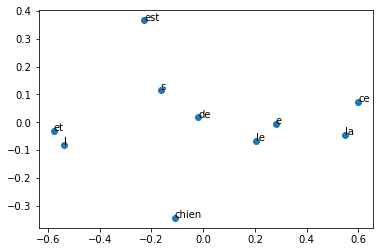

In [10]:
X = model_skip.wv.__getitem__(model_skip.wv.index_to_key)

pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)
plt.scatter(result[:,0], result[:,1])
words_skip = list(model_skip.wv.index_to_key)
for i, word in enumerate(words_skip[:100]):
    plt.annotate(word,xy=(result[i,0], result[i,1]))
plt.show()